In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#for data analysis and data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#for model building and training
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
#for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
movies = pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv", encoding = 'latin1')
movies.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
movies.shape

(15509, 10)

In [4]:
movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
movies.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
movies['Genre'].nunique()

485

In [10]:
movies['Genre'].head()

0              Drama
1              Drama
2     Drama, Musical
3    Comedy, Romance
4              Drama
Name: Genre, dtype: object

In [11]:
movies['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [12]:
movies['Rating'].unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [13]:
movies['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [14]:
by_genre=movies.groupby(['Genre']).count()
by_genre

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [15]:
movies["Director"].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [16]:
movies.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [17]:
print("No. of Null values in Year's column:", movies['Year'].isnull().sum())
print("No. of Null values in Genre's column:", movies['Genre'].isnull().sum())

No. of Null values in Year's column: 528
No. of Null values in Genre's column: 1877


In [18]:
movies.dropna(subset='Year', inplace = True)
movies.dropna(subset='Genre', inplace = True)

In [19]:
print("No. of Null values in Year's column:", movies['Year'].isnull().sum())
print("No. of Null values in Genre's column:", movies['Genre'].isnull().sum())

No. of Null values in Year's column: 0
No. of Null values in Genre's column: 0


In [20]:
movies.dropna(subset='Year', inplace = True)
movies.dropna(subset='Genre', inplace = True)

In [21]:
print("No. of Null values in Year's column:", movies['Year'].isnull().sum())
print("No. of Null values in Genre's column:", movies['Genre'].isnull().sum())

No. of Null values in Year's column: 0
No. of Null values in Genre's column: 0


In [22]:
movies['Rating'].fillna(value = movies['Rating'].mode().max(), inplace=True)
movies['Duration'].fillna( value =movies['Duration'].mode().max(), inplace=True)
movies['Votes'].fillna(value = movies['Votes'].mode().max(), inplace=True)

/tmp/ipykernel_33/2987491230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['Rating'].fillna(value = movies['Rating'].mode().max(), inplace=True)
/tmp/ipykernel_33/2987491230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [23]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",6.2,7,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,6.2,7,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [24]:
movies.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [25]:
movies.duplicated().sum()

4

In [26]:
movies[movies['Rating']<=5].groupby('Rating').count()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
Rating,,,,,,,,,
1.1,1,1,1,1,1,1,1,1,1
1.4,1,1,1,1,1,1,1,1,1
1.6,3,3,3,3,3,3,3,3,3
1.7,5,5,5,5,5,5,5,5,5
1.8,4,4,4,4,4,4,4,4,4
1.9,6,6,6,6,6,6,6,6,6
2.0,4,4,4,4,4,4,4,4,3
2.1,8,8,8,8,8,8,8,8,8
2.2,5,5,5,5,5,5,5,5,5


In [27]:
movies[movies['Rating']>=5].groupby('Rating').count()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
Rating,,,,,,,,,
5.0,149,149,149,149,149,149,149,149,149
5.1,165,165,165,165,165,165,165,165,165
5.2,138,138,138,138,138,138,137,137,137
5.3,170,170,170,170,170,170,170,169,167
5.4,205,205,205,205,205,205,203,203,202
5.5,167,167,167,167,167,167,167,165,163
5.6,196,196,196,196,196,196,195,195,193
5.7,197,197,197,197,197,197,197,197,195
5.8,204,204,204,204,204,204,201,199,198


In [28]:
def plot_histogram(x,title, xlabel, ylabel):
    global movies
    plt.figure(figsize=(8, 6))
    plt.hist(movies[x], bins=10, color='skyblue', edgecolor='white')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

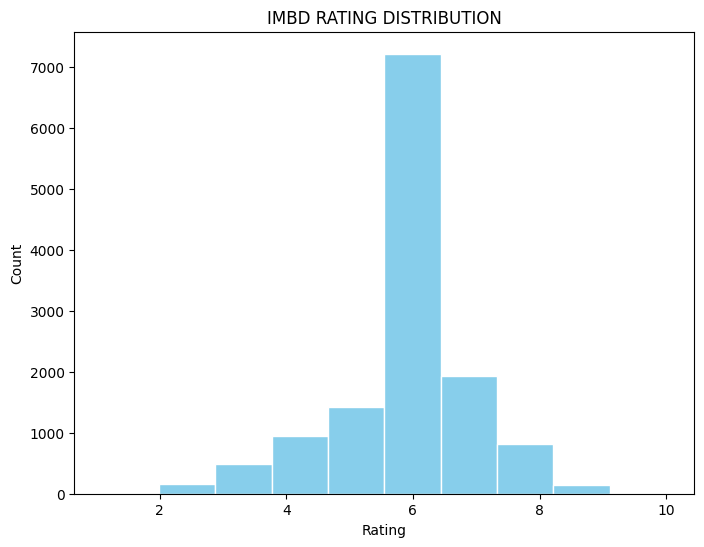

In [29]:
plot_histogram('Rating', 'IMBD RATING DISTRIBUTION', 'Rating', 'Count')

In [31]:
def top(column, y):
    global movies
    top_values = movies[column].value_counts().sort_values(ascending=False)[:y]
    plt.figure(figsize=(15, 10))
    plt.stem(top_values.index, top_values.values, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top {y} {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

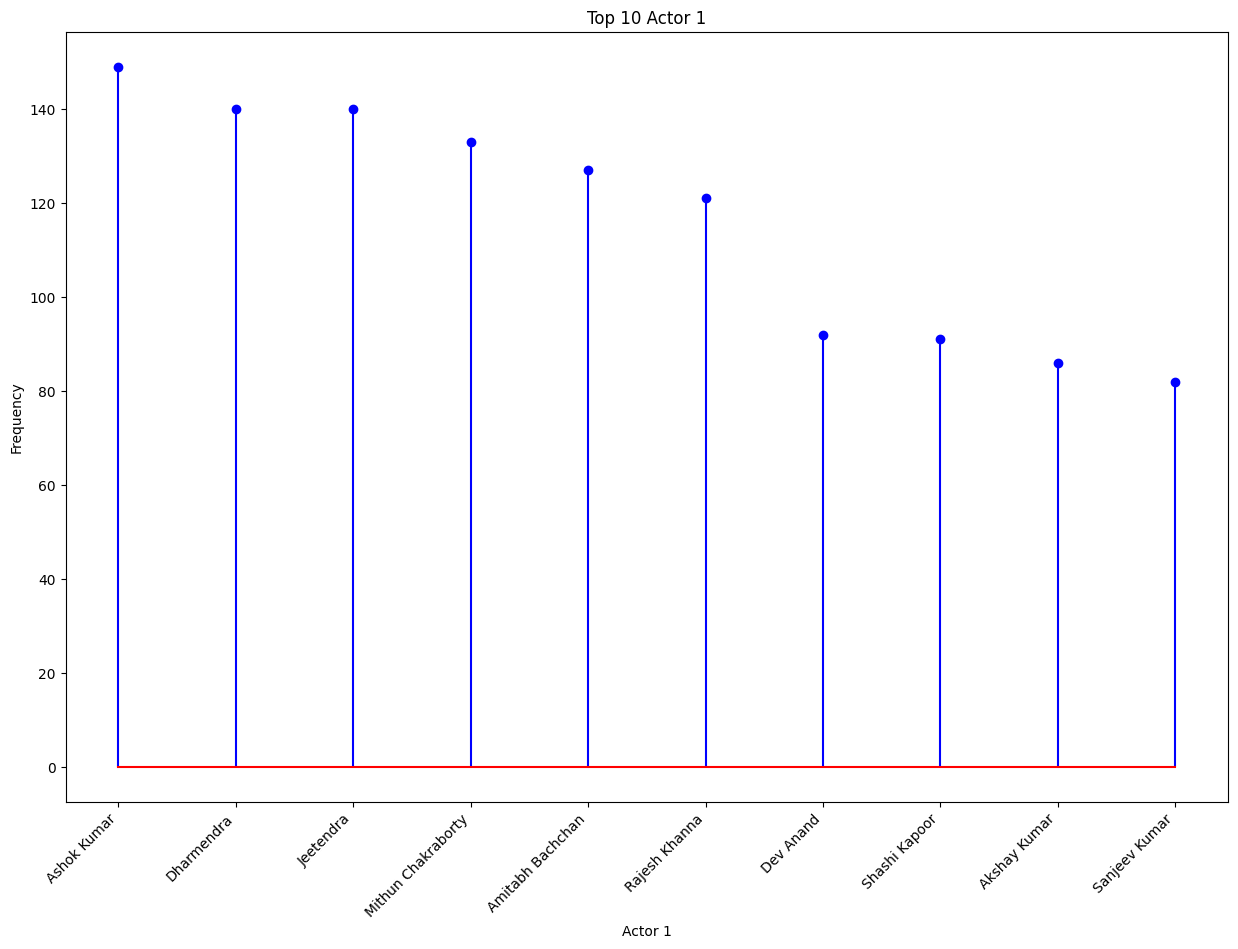

In [32]:
top('Actor 1', 10)

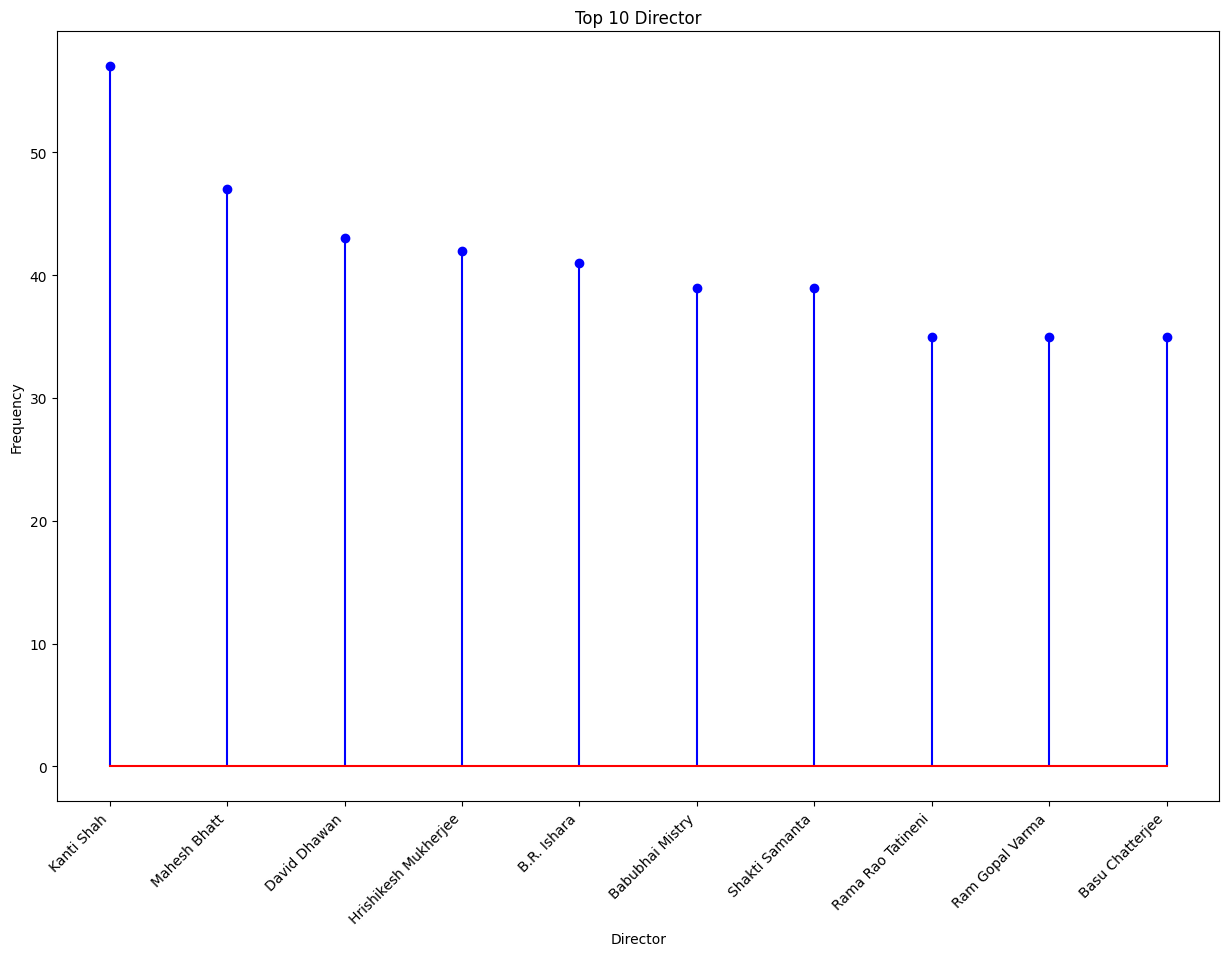

In [33]:
top('Director', 10)

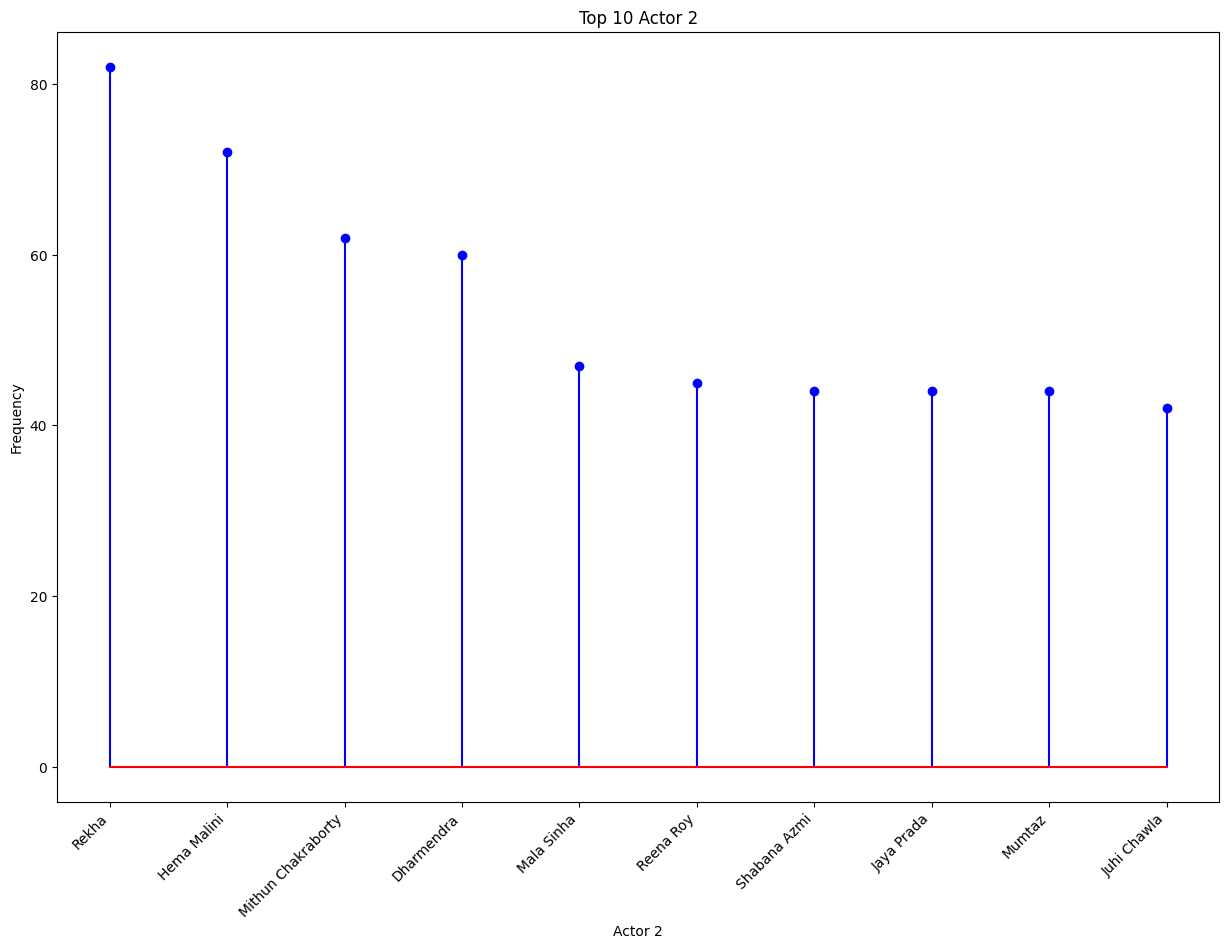

In [34]:
top('Actor 2', 10)

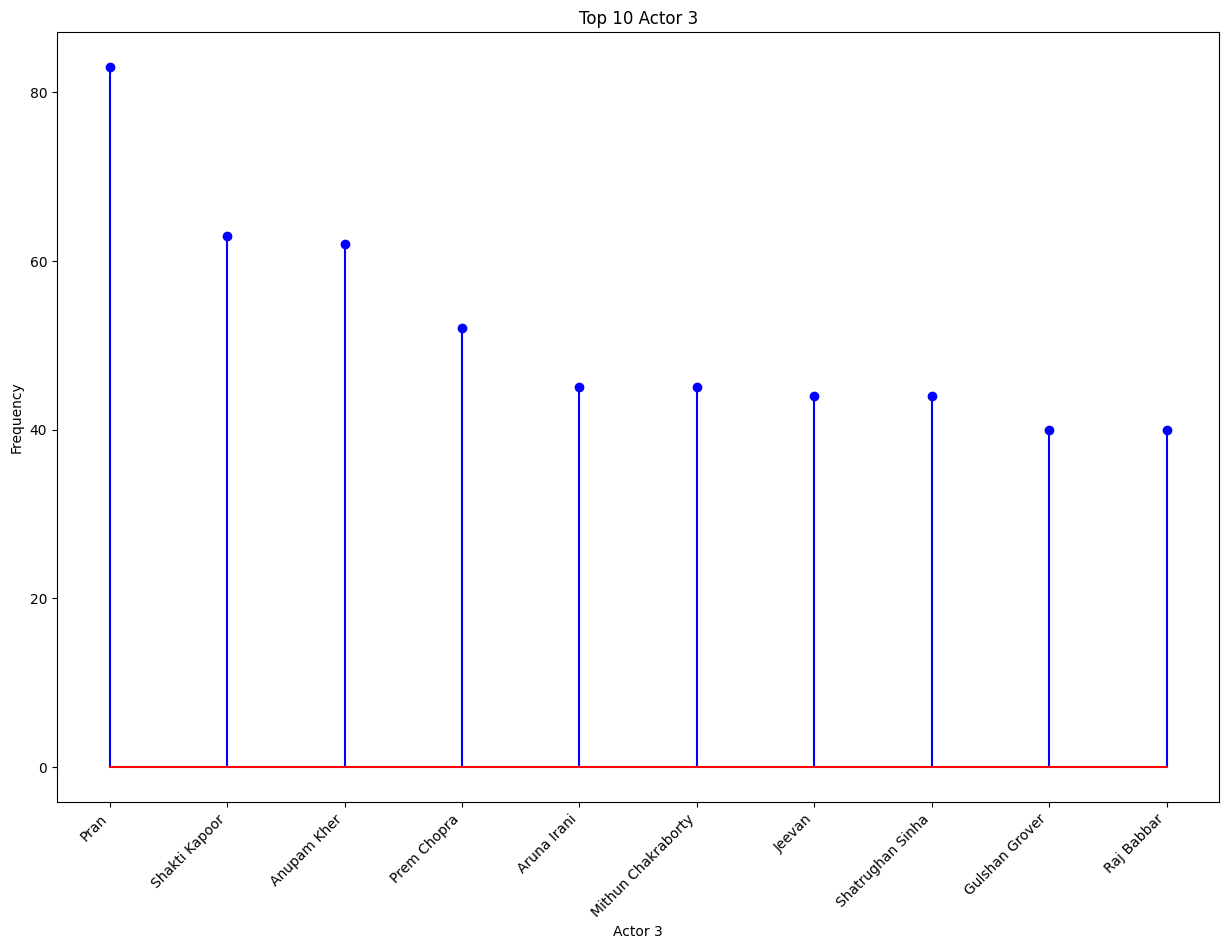

In [35]:
top('Actor 3', 10)

In [36]:
movies.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [37]:
movies.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace = True)

In [38]:
movies.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [39]:
df = movies.copy()
df1 = movies.copy()

In [40]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [41]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,272,7.0,8,1177,2638,4089,498
2,#Homecoming,(2021),90 min,323,6.2,7,3897,2986,2465,3147
3,#Yaaram,(2019),110 min,219,4.4,35,2523,2346,1291,3672
4,...And Once Again,(2010),105 min,272,6.2,7,299,2504,2980,382
5,...Aur Pyaar Ho Gaya,(1997),147 min,188,4.7,827,2901,742,109,3496
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,(1979),120 min,0,6.2,7,1067,2597,1328,4147
15503,Zulm Ki Zanjeer,(1989),125 min,28,5.8,44,3385,813,1371,2858
15504,Zulm Ko Jala Doonga,(1988),120 min,0,4.6,11,2051,2082,3684,3890
15505,Zulmi,(1999),129 min,39,4.5,655,1915,189,3881,491


In [42]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
# Assuming 'Duration' column contains strings like '120 min'
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Votes'] = df['Votes'].str.extract('(\d+)').astype(float)

In [43]:
df.dtypes

Name         object
Year        float64
Duration    float64
Genre         int64
Rating      float64
Votes       float64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

In [44]:
X = df[['Year', 'Duration', 'Votes', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']]
Y = df['Rating']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


#for decisiontreeregressor

decisiontreeregressor = tree.DecisionTreeRegressor(splitter = 'best')
decisiontreeregressor.fit(X_train, Y_train)
dtr_predict = decisiontreeregressor.predict(x_test)

#for linearregression
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)
lr_predict = lr.predict(x_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, dtr_predict)
mse = mean_squared_error(y_test, dtr_predict)
rmse = mean_squared_error(y_test, dtr_predict, squared=False)  # RMSE
r2 = r2_score(y_test, dtr_predict)

# Print evaluation metrics
print("Mean Absolute Error for Decision tree Regressor:", mae)
print("Mean Squared Error for Decision tree Regressor:", mse)
print("Root Mean Squared Error for Decision tree Regressor:", rmse)
print("R-squared (R²) Score for Decision tree Regressor:", r2)

print('\n')
# Compute evaluation metrics
mae = mean_absolute_error(y_test, lr_predict)
mse = mean_squared_error(y_test, lr_predict)
rmse = mean_squared_error(y_test, lr_predict, squared=False)  # RMSE
r2 = r2_score(y_test, lr_predict)

# Print evaluation metrics
print("Mean Absolute Error for Linear Regression:", mae)
print("Mean Squared Error for Linear Regression:", mse)
print("Root Mean Squared Error for Linear Regression:", rmse)
print("R-squared (R²) Score for Linear Regression:", r2)

Mean Absolute Error for Decision tree Regressor: 0.889379932356259
Mean Squared Error for Decision tree Regressor: 1.9393596392333712
Root Mean Squared Error for Decision tree Regressor: 1.3926089326273083
R-squared (R²) Score for Decision tree Regressor: -0.49586663704451617


Mean Absolute Error for Linear Regression: 0.8073032980927713
Mean Squared Error for Linear Regression: 1.2417193822030212
Root Mean Squared Error for Linear Regression: 1.1143246305287438
R-squared (R²) Score for Linear Regression: 0.04223715971356601


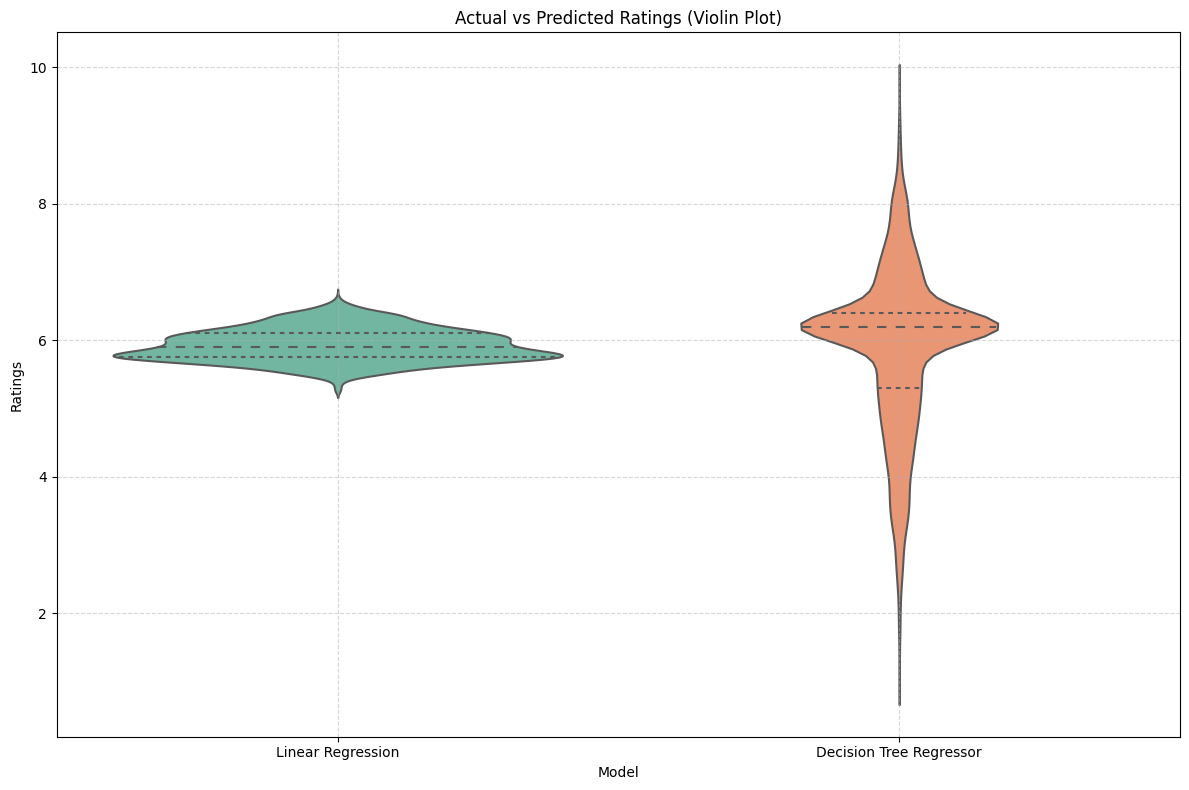

In [45]:
# Combine actual and predicted ratings into a DataFrame
plot_data = pd.DataFrame({'Actual Ratings': y_test, 
                          'Linear Regression': lr_predict, 
                          'Decision Tree Regressor': dtr_predict})

# Melt the DataFrame to long format for plotting
plot_data = plot_data.melt(id_vars=['Actual Ratings'], var_name='Model', value_name='Predicted Ratings')

# Create violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Model', y='Predicted Ratings', data=plot_data, palette='Set2', inner='quartile')
plt.title('Actual vs Predicted Ratings (Violin Plot)')
plt.xlabel('Model')
plt.ylabel('Ratings')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
df1['Year'] = df1['Year'].str.extract('(\d+)').astype(float)
# Assuming 'Duration' column contains strings like '120 min'
df1['Duration'] = df1['Duration'].str.extract('(\d+)').astype(float)
df1['Votes'] = df1['Votes'].str.extract('(\d+)').astype(float)

In [47]:
actor1_encoding = df1.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding = df1.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding = df1.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding = df1.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding = df1.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

df1['actor1_encoded'] = round(df1['Actor 1'].map(actor1_encoding['Rating']), 1)
df1['actor2_encoded'] = round(df1['Actor 2'].map(actor2_encoding['Rating']), 1)
df1['actor3_encoded'] = round(df1['Actor 3'].map(actor3_encoding['Rating']), 1)
df1['director_encoded'] = round(df1['Director'].map(director_encoding['Rating']), 1)
df1['genre_encoded'] = round(df1['Genre'].map(genre_encoding['Rating']), 1)

df1.drop(['Name','Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [48]:
df1.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019.0,109.0,7.0,8.0,6.8,7.0,7.0,7.0,6.3
2,2021.0,90.0,6.2,7.0,6.6,7.0,6.2,6.2,6.5
3,2019.0,110.0,4.4,35.0,5.4,4.4,4.4,4.4,5.8
4,2010.0,105.0,6.2,7.0,6.9,5.8,5.7,6.3,6.3
5,1997.0,147.0,4.7,827.0,4.8,5.8,5.9,5.4,6.2


In [49]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


X = df1[['Year', 'Duration', 'Votes', 'genre_encoded', 'actor1_encoded', 'actor2_encoded','actor3_encoded', 'director_encoded']]
Y = df1['Rating']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)
# Train LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, Y_train)

# Evaluate model performance
y_pred = lgb_model.predict(x_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test,y_pred)

# Print evaluation metrics
print("Mean Absolute Error for Light GBM Regressor:", mae)
print("Mean Squared Error for Light GBM Regressor:", mse)
print("Root Mean Squared Error for Light GBM Regressor:", rmse)
print("R-squared (R²) Score for Light GBM Regressor:", r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 6651, number of used features: 8
[LightGBM] [Info] Start training from score 5.927319
Mean Absolute Error for Light GBM Regressor: 0.34748149884211543
Mean Squared Error for Light GBM Regressor: 0.29268923759784177
Root Mean Squared Error for Light GBM Regressor: 0.541007613253124
R-squared (R²) Score for Light GBM Regressor: 0.7742429734602094


In [50]:
decisiontreeregressor = tree.DecisionTreeRegressor(splitter = 'best')
decisiontreeregressor.fit(X_train, Y_train)
dtr_predict = decisiontreeregressor.predict(x_test)

#for linearregression
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)
lr_predict = lr.predict(x_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, dtr_predict)
mse = mean_squared_error(y_test, dtr_predict)
rmse = mean_squared_error(y_test, dtr_predict, squared=False)  # RMSE
r2 = r2_score(y_test, dtr_predict)

# Print evaluation metrics
print("Mean Absolute Error for Decision tree Regressor:", mae)
print("Mean Squared Error for Decision tree Regressor:", mse)
print("Root Mean Squared Error for Decision tree Regressor:", rmse)
print("R-squared (R²) Score for Decision tree Regressor:", r2)

print('\n')
# Compute evaluation metrics
mae = mean_absolute_error(y_test, lr_predict)
mse = mean_squared_error(y_test, lr_predict)
rmse = mean_squared_error(y_test, lr_predict, squared=False)  # RMSE
r2 = r2_score(y_test, lr_predict)

# Print evaluation metrics
print("Mean Absolute Error for Linear Regression:", mae)
print("Mean Squared Error for Linear Regression:", mse)
print("Root Mean Squared Error for Linear Regression:", rmse)
print("R-squared (R²) Score for Linear Regression:", r2)

Mean Absolute Error for Decision tree Regressor: 0.4799774520856841
Mean Squared Error for Decision tree Regressor: 0.6552987598647125
Root Mean Squared Error for Decision tree Regressor: 0.8095052562304413
R-squared (R²) Score for Decision tree Regressor: 0.49455504159828856


Mean Absolute Error for Linear Regression: 0.4311034032314252
Mean Squared Error for Linear Regression: 0.3690253205047758
Root Mean Squared Error for Linear Regression: 0.6074745430919519
R-squared (R²) Score for Linear Regression: 0.71536343543482


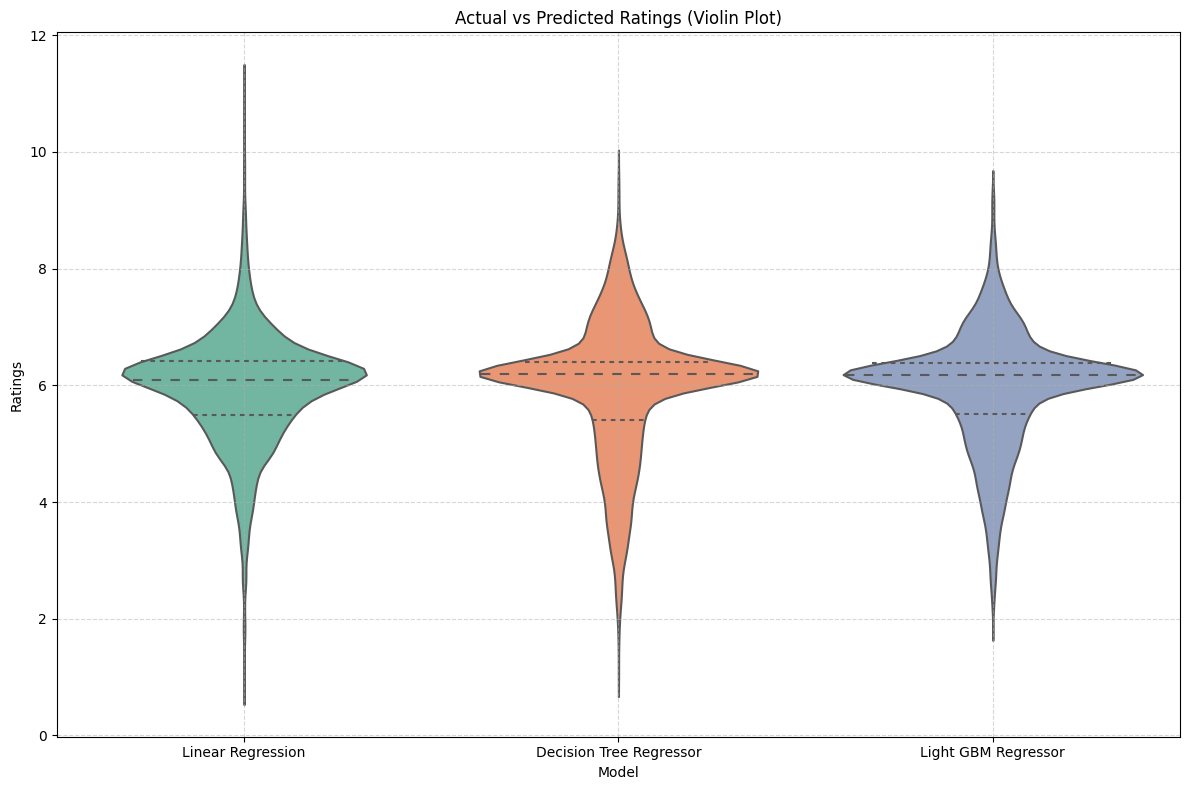

In [51]:
# Combine actual and predicted ratings into a DataFrame
plot_data = pd.DataFrame({'Actual Ratings': y_test, 
                          'Linear Regression': lr_predict, 
                          'Decision Tree Regressor': dtr_predict, 
                          'Light GBM Regressor': y_pred})

# Melt the DataFrame to long format for plotting
plot_data = plot_data.melt(id_vars=['Actual Ratings'], var_name='Model', value_name='Predicted Ratings')

# Create violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Model', y='Predicted Ratings', data=plot_data, palette='Set2', inner='quartile')
plt.title('Actual vs Predicted Ratings (Violin Plot)')
plt.xlabel('Model')
plt.ylabel('Ratings')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()